In [1]:
#In Synthetic Minority Oversampling TEchnique (SMOTE) it connects two nearest numbers in x-y plane from minority section

In [2]:
#And interpolate some extra numbers on the line to generate more numbers

In [3]:
#So the variance increases(changes) unlike normal upsampling

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

In [8]:
x

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [9]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [4]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
df_final=pd.concat([df1,df2],axis=1)

In [13]:
df_final.tail()

,f1,f2,target
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0
999,-0.302876,-0.575975,0


In [16]:
df_final['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

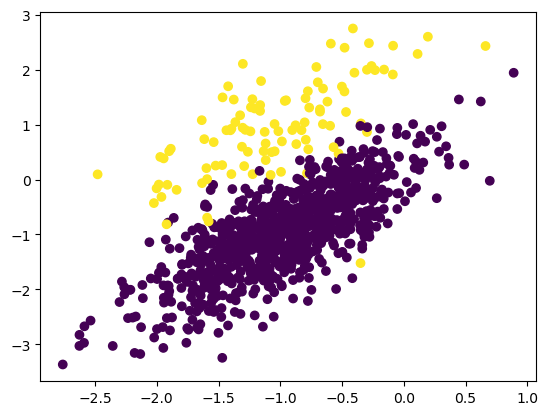

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df_final['f1'],df_final['f2'],c=df_final['target'])

In [6]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [7]:
from imblearn.over_sampling import SMOTE

In [12]:
#transform the dataset
smote=SMOTE()
a,b=smote.fit_resample(df_final[['f1','f2']],df_final['target'])

In [13]:
a.shape

(1800, 2)

In [14]:
b.shape

(1800,)

In [15]:
len(b[b==0])

900

In [16]:
len(b[b==1])

900

In [18]:
df1=pd.DataFrame(a,columns=['f1','f2'])
df2=pd.DataFrame(b,columns=['target'])
df_oversampled_smote=pd.concat([df1,df2],axis=1)
df_oversampled_smote.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


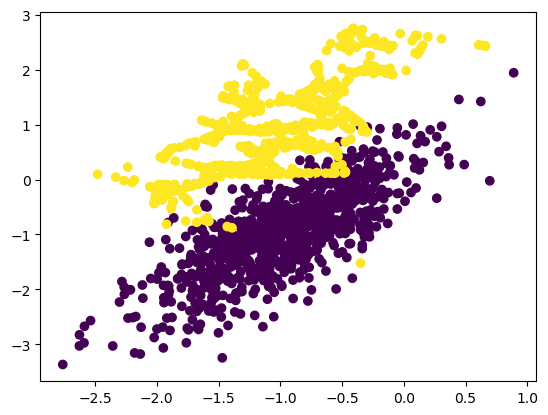

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df_oversampled_smote['f1'],df_oversampled_smote['f2'],c=df_oversampled_smote['target'])